## Student Performance Indicator

### Life Cycle of a Machine Learning Project

* Understanding the Project
* Data Collection and Preprocessing
* Exploratory Data Analysis
* Data Pre-Processing
* Model Traning
* Choose the Best Model


### 1) Problem Statment
* This Project understands how the student's performance (test scores) is affected by the diffrent variables like Gender, Ethicity, Parental level of Education, Lunch and Test Preparation courses. 

### 2) Data Colection
* Dataset Source - https://www.kaggle.com/datasets/spscientist/students-performance-in-exams?resource=download
* The Dataet Consist of 8 coloumns and 1000 rows

### 2.1) Import Data and Required Packages.
#### Importing Pandas, Numpy, Matplotlib, Seaborn and Warning Library.

In [50]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
%matplotlib inline
warnings.filterwarnings('ignore')

#### Import CSV data as pandas DataFrame

In [51]:
df = pd.read_csv(r'C:\Users\ankit\OneDrive\Desktop\Machine_Learning_Project\notebook\data\StudentsPerformance.csv')
df

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75
...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88,99,95
996,male,group C,high school,free/reduced,none,62,55,55
997,female,group C,high school,free/reduced,completed,59,71,65
998,female,group D,some college,standard,completed,68,78,77


### 2.2) DataSet Information
* gender: sex of students -> (Male/Female)
* race/ethnicity: ethnicity of students -> (Group A,B,C,D,E)
* parental level of education: Parent's Final Education -> (bachlor's degree, some college, master's degree, assosiate's degree, high school)
* lunch: having lunch before the test (standard or free/reduced)
* test preparation course : complete or not complete before test
* maths score
* reading score
* writing score

### 3) Data checks to perform
* Check Missing vslues
* Check Duplicates
* Check Data Types
* Check the number of unique values of each coloumn
* Check statistics of data set
* Check various categories present in the different categorical coloumns

### 3.1) Check mising values

In [52]:
df.isna().sum()


gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

#### There is no missing values in the dataset.

### 3.2) Check Duplicates

In [53]:
df.duplicated().sum()

np.int64(0)

#### There are no duplicated values

### 3.3) Check Datatypes

In [54]:
# Check null and datatypes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


#### There is no any null values and the datatypes are either object or int

### 3.4) Check the number of unique values in each coloumn

In [55]:
df.nunique()

gender                          2
race/ethnicity                  5
parental level of education     6
lunch                           2
test preparation course         2
math score                     81
reading score                  72
writing score                  77
dtype: int64

#### So these values state tha there are this much diffrent values in the respective coloumns

### 3.5) Check the statistics of data set

In [56]:
df.describe()

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


#### This is the stastical representation of the given datasets. It shows all the stastical things about the data.

### 3.6) Exploring of data

* Seeing all the categorial features inside our dataset to get the knowlege about the dataset.

In [57]:
print("Categories in 'gender' variable :  ",end= " ")
print (df['gender'].unique())

print("Categories in ' race/ethnicity' variable :  ",end= " ")
print (df['race/ethnicity'].unique())

print("Categories in 'parental level of education' variable :  ",end= " ")
print (df['parental level of education'].unique())

print("Categories in 'lunch' variable :  ",end= " ")
print (df['lunch'].unique())

print("Categories in 'test preparation course ' variable :  ",end= " ")
print (df['test preparation course'].unique())

Categories in 'gender' variable :   ['female' 'male']
Categories in ' race/ethnicity' variable :   ['group B' 'group C' 'group A' 'group D' 'group E']
Categories in 'parental level of education' variable :   ["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']
Categories in 'lunch' variable :   ['standard' 'free/reduced']
Categories in 'test preparation course ' variable :   ['none' 'completed']


* Define the numerical and categorical featurs

In [58]:
numeric_features = [feature for feature in df.columns if df[feature].dtype != 'O']
# It is used to find all the numeric_features inside our datafraame. 
# The loop suggests that it will iterate through all the columns and help u find the columns that are numeric in nature i.e int64.

categorical_features = [feature for feature in df.columns if df[feature].dtype == 'O']
# It is used to find all the categorical_features inside our datafraame. 
# The loop suggests that it will iterate through all the columns and help u find the columns that are categorical in nature i.e object.

# Print all the columns
print('We have {} numerical features : {}'.format(len(numeric_features), numeric_features))
# {} -> The first placeholder is filled by the len i.e how many numeric_features are there.
# {} -> The second placeholder is filles by the column names of all the numeric_features.
# .format helps us to fill the placeholders i.e {}.

print('We have {} categorical_features : {}'.format(len(categorical_features), categorical_features))
# {} -> The first placeholder is filled by the len i.e how many numeric_features are there.
# {} -> The second placeholder is filles by the column names of all the numeric_features.



We have 3 numerical features : ['math score', 'reading score', 'writing score']
We have 5 categorical_features : ['gender', 'race/ethnicity', 'parental level of education', 'lunch', 'test preparation course']


### 3.7) Feature Engineering -> Adding Columns for the "Total Score" and "Average"

In [59]:
df['total score'] = df['math score'] + df['reading score'] + df['writing score']
df['average'] = df['total score']/3
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,total score,average
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333
2,female,group B,master's degree,standard,none,90,95,93,278,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.333333
4,male,group C,some college,standard,none,76,78,75,229,76.333333


* Finding the students with full marks in diffrent categories i.e maths , reading , writing

In [60]:
reading_full = df[df['reading score']== 100]['average'].count()
writing_full = df[df['writing score']== 100]['average'].count()
maths_full = df[df['math score']== 100]['average'].count()

print(f"Number of students with full marks in Maths : {maths_full}")
print(f"Number of students with full marks in Reading : {reading_full}")
print(f"Number of students with full marks in Writing : {writing_full}")


Number of students with full marks in Maths : 7
Number of students with full marks in Reading : 17
Number of students with full marks in Writing : 14


* Finding students whose marks are less that or equal to 20 i.e to find the poor students.

In [62]:
reading_less_or_equal_20 = df[df['reading score'] <= 20]['average'].count()
writing_less_or_equal_20 = df[df['writing score'] <= 20]['average'].count()
maths_less_or_equal_20 = df[df['math score'] <= 20]['average'].count()

print(f"Number of students with less than or equal to 20 marks in Maths : {maths_less_or_equal_20}")
print(f"Number of students with less than or equal to 20 marks in Reading : {reading_less_or_equal_20}")
print(f"Number of students with less than or equal to 20 marks in Writing : {writing_less_or_equal_20}")


Number of students with less than or equal to 20 marks in Maths : 4
Number of students with less than or equal to 20 marks in Reading : 1
Number of students with less than or equal to 20 marks in Writing : 3


* The avobe observation shows that the  more students are weaker in Maths.
* The avobe observation shows that the more students are good in Writing. 

### 4) Exploring Data (Visualization)

#### 4.1) Visualize average score distribution to make some conclusions

* Histogram
* Kernel Distribution Function

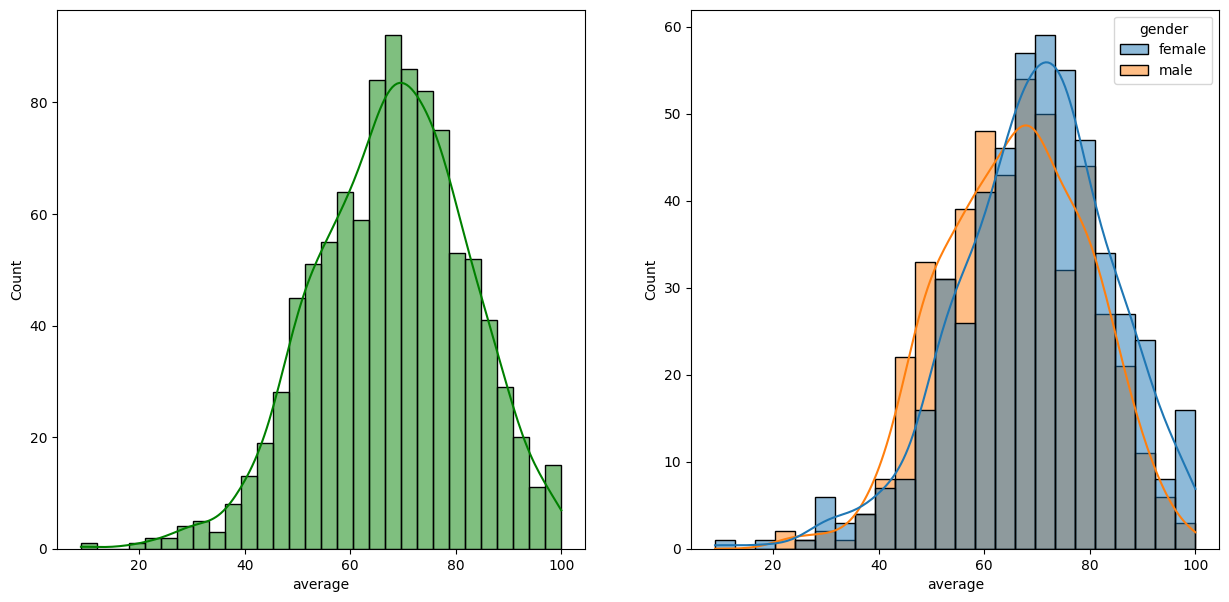

In [63]:
fig , axs = plt.subplots(1,2, figsize = (15,7))
plt.subplot(121)
sns.histplot(data=df, x='average', bins=30, kde=True, color='g')
plt.subplot(122)
sns.histplot(data=df, x='average', kde=True, hue='gender')
plt.show()

* The avobe graphs show that the females perform well than male students.

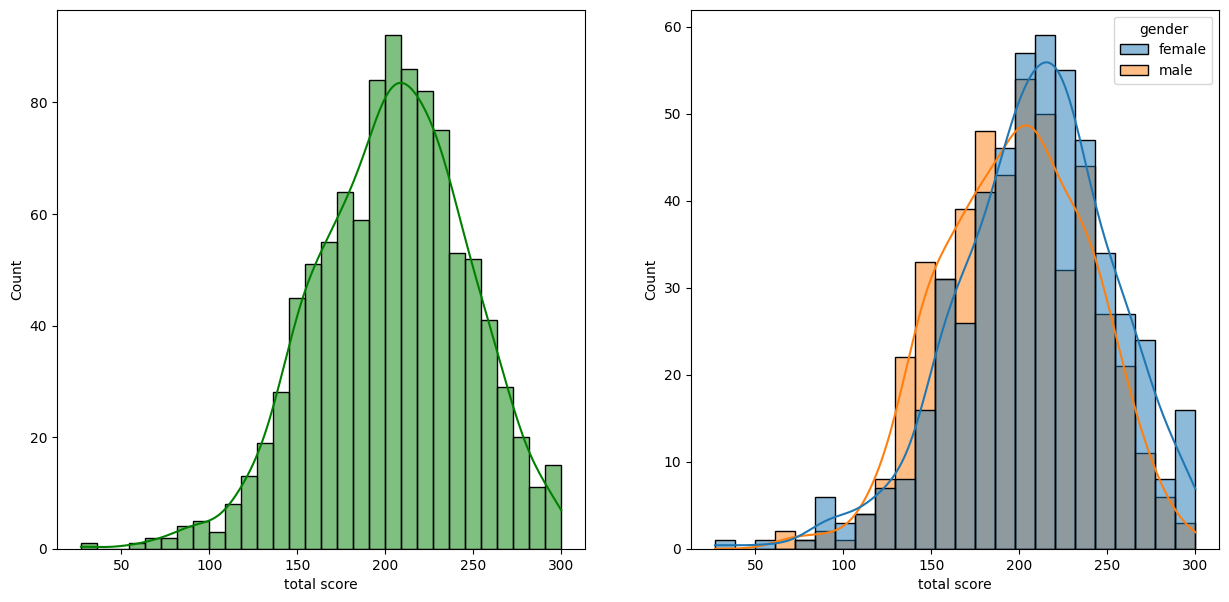

In [65]:
fig , axs = plt.subplots(1,2, figsize = (15,7))
plt.subplot(121)
sns.histplot(data=df, x='total score', bins=30, kde=True, color='g')
plt.subplot(122)
sns.histplot(data=df, x='total score', kde=True, hue='gender')
plt.show()

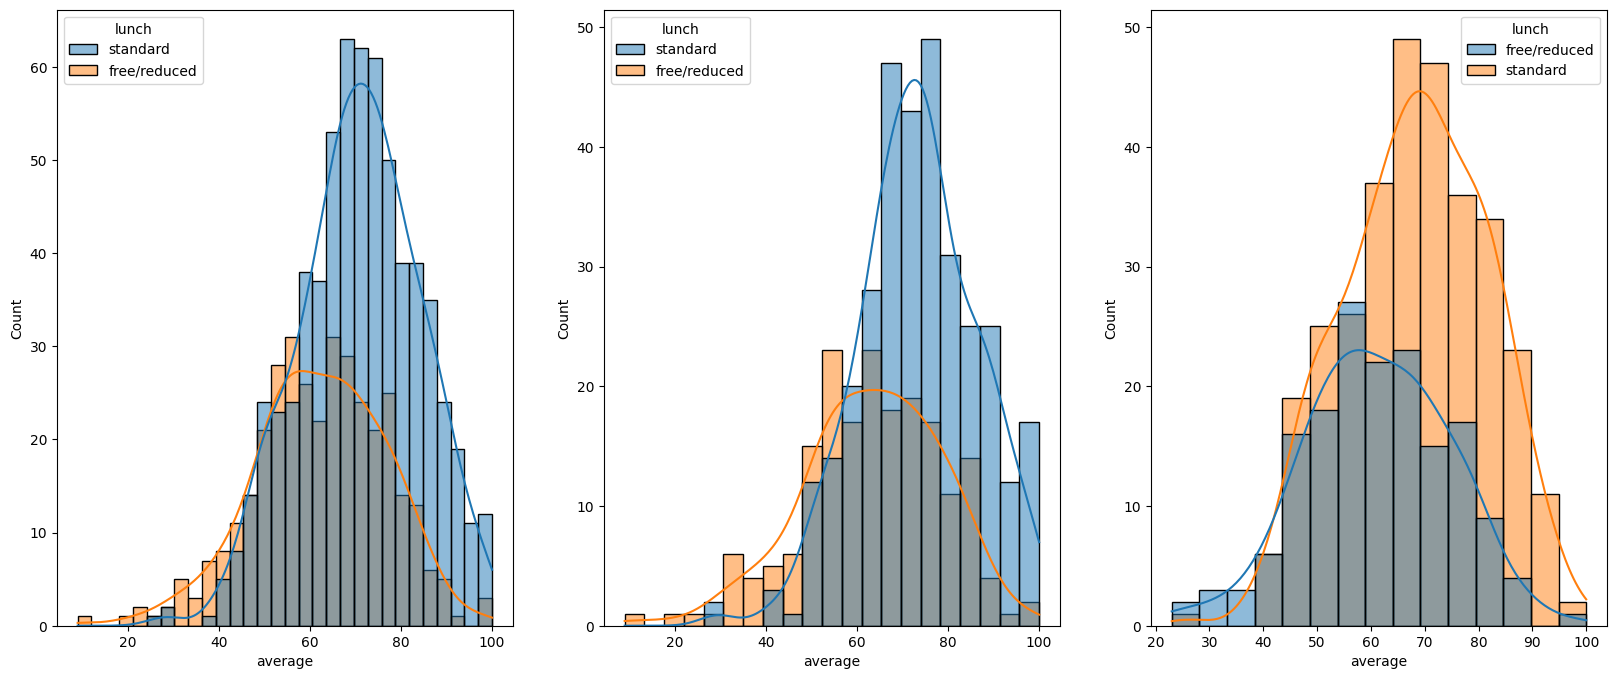

In [72]:
fig , axs = plt.subplots(1,3, figsize = (20,8))
plt.subplot(131)
sns.histplot(data=df, x='average', bins=30, kde=True, hue='lunch',  ax=axs[0])
plt.subplot(132)
sns.histplot(data=df[df.gender=='female'], x='average', kde=True, hue='lunch')
plt.subplot(133)
sns.histplot(data=df[df.gender=='male'], x='average', kde=True, hue='lunch')
plt.show()

* Standard lunch helps to perform well in the examination.

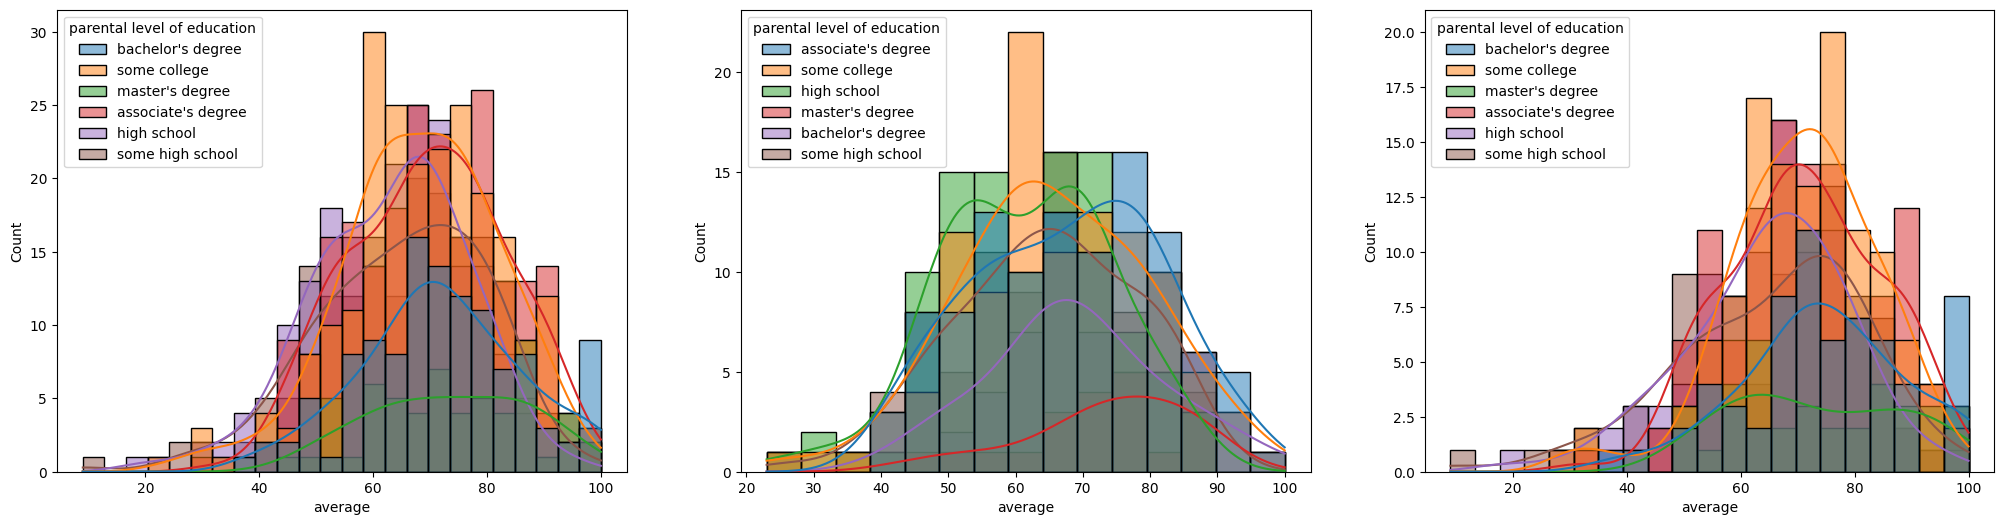

In [ ]:
plt.subplots(1,3, figsize= (25,6))
plt.subplot(131)
ax = sns.histplot(data=df, x= 'average', kde=True, hue= 'parental level of education')
plt.subplot(132)
ax = sns.histplot(data=df[df.gender== 'male'],x='average',kde=True, hue='parental level of education')
plt.subplot(133)
ax = sns.histplot(data=df[df.gender== 'female'],x='average',kde=True, hue='parental level of education')
plt.show()

* The observation suggest that paternal level of education does not define the marks of students because in some case the paternal education is too good but the marks scored by the student is not good on the other hand the parental education is not of masters or soo but the students perform welll in the examination

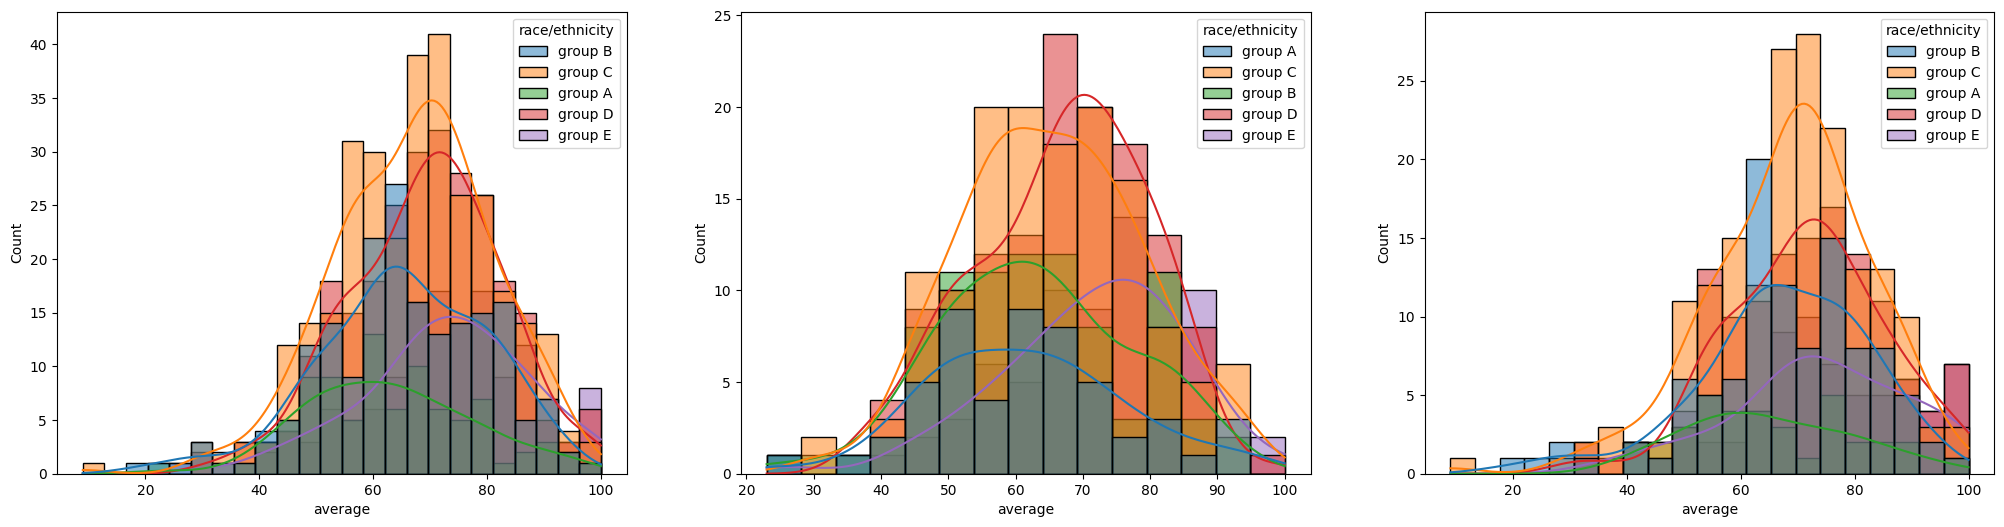

In [75]:
plt.subplots(1,3, figsize= (25,6))
plt.subplot(131)
ax = sns.histplot(data=df, x= 'average', kde=True, hue= 'race/ethnicity')
plt.subplot(132)
ax = sns.histplot(data=df[df.gender== 'male'],x='average',kde=True, hue='race/ethnicity')
plt.subplot(133)
ax = sns.histplot(data=df[df.gender== 'female'],x='average',kde=True, hue='race/ethnicity')
plt.show()

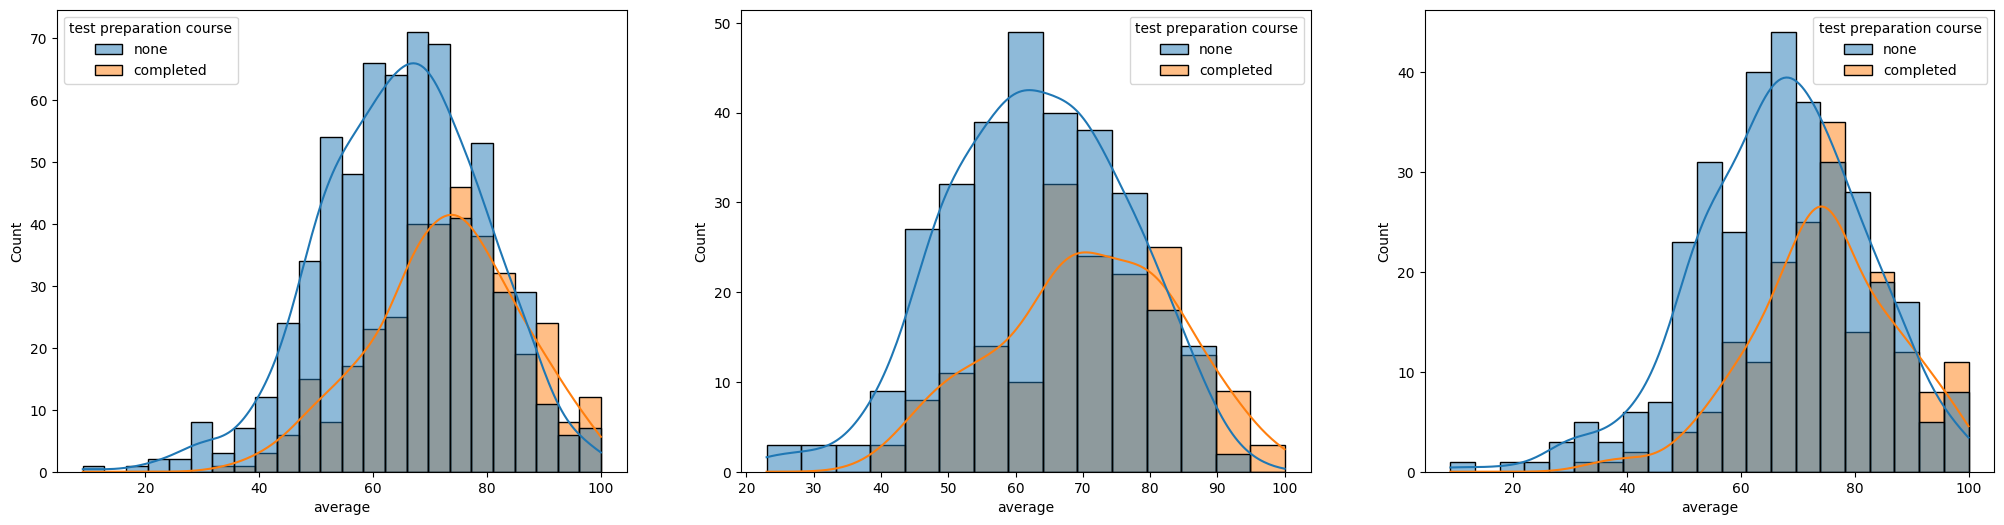

In [76]:
plt.subplots(1,3, figsize= (25,6))
plt.subplot(131)
ax = sns.histplot(data=df, x= 'average', kde=True, hue= 'test preparation course')
plt.subplot(132)
ax = sns.histplot(data=df[df.gender== 'male'],x='average',kde=True, hue='test preparation course')
plt.subplot(133)
ax = sns.histplot(data=df[df.gender== 'female'],x='average',kde=True, hue='test preparation course')
plt.show()

* The test preparation courses procdued a huge impact on the student scores.
* Those students who have completed the preparation courses are getting higher marks.

### 4.2) Maximum score of a student in all three subjects

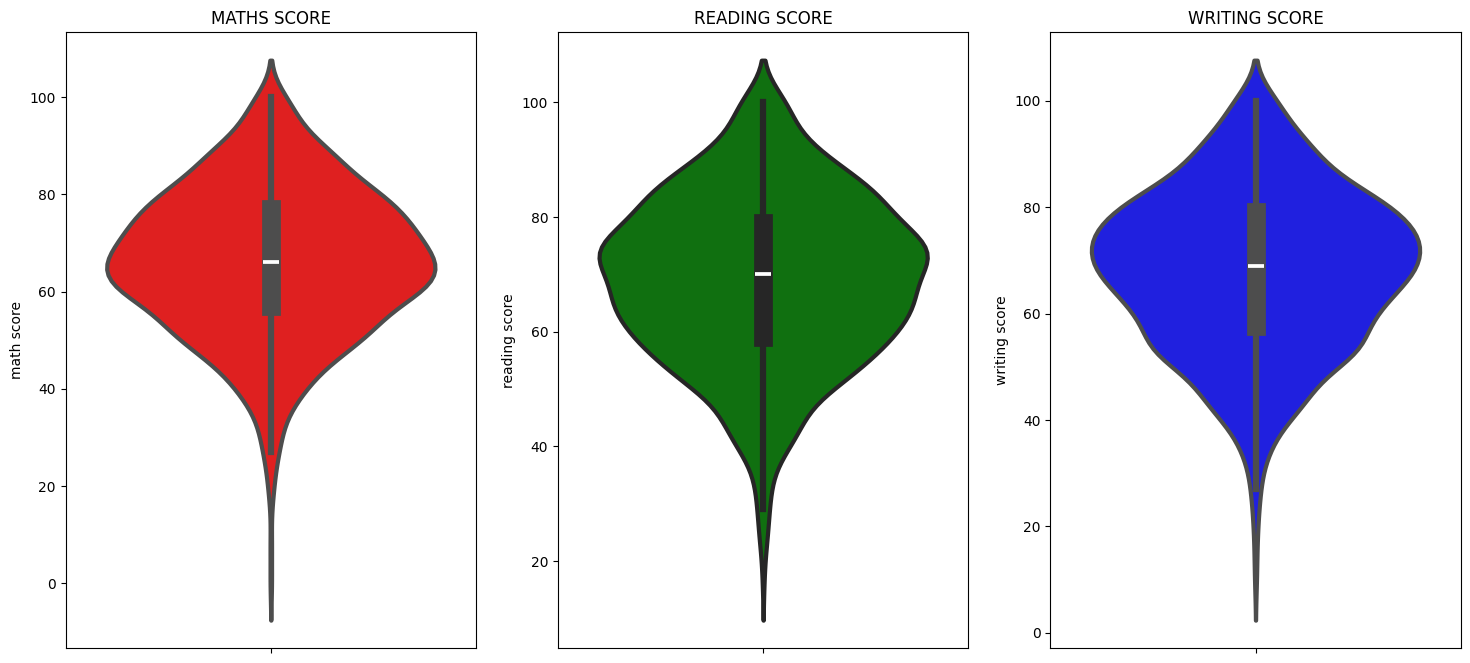

In [78]:
plt.figure(figsize=(18,8))
plt.subplot(1,3,1)
plt.title('MATHS SCORE')
sns.violinplot(y = 'math score', data=df, color='red', linewidth=3)
plt.subplot(1,3,2)
plt.title('READING SCORE')
sns.violinplot(y = 'reading score', data=df, color='green', linewidth=3)
plt.subplot(1,3,3)
plt.title('WRITING SCORE')
sns.violinplot(y = 'writing score', data=df, color='blue', linewidth=3)
plt.show()

* This shows that the marks obtained by most number of students in each subject is between 60 & 80